In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve
from sklearn.metrics import roc_auc_score, plot_confusion_matrix

from sklearn.feature_selection import mutual_info_classif,f_classif

import warnings
warnings.filterwarnings("ignore")

## Training Dataset

In [2]:
# Used to established a connection with database

cnn = sqlite3.connect("Dataset_IQ.db")
cursor = cnn.cursor()

In [3]:
# Used to see tables available in database

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('Dataset_IQ',)]


In [4]:
train_df = pd.read_sql_query("select * from Dataset_IQ", cnn)

In [5]:
train_df.head()

,dd.id,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,...,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Study_or_solve_doubt_using_online_platform_or_video_of_article,IQ
0,1,97,8,6,5,5,6,6,10,8,...,1,0,None,1-<2hours,veryhigh,1,0,Instagram,1.0,Ordinary
1,2,96,8,10,10,8,10,9,10,7,...,1,0,Upper_Primary,4to<6hours,moderate,0,1,Noneoftheabove,8.5,Extraordinary
2,3,96,7,9,6,5,6,6,10,6,...,1,1,Higher_Secondary,6+hours,veryhigh,1,0,Facebook,1.0,Ordinary
3,4,91,7,6,7,8,8,7,10,4,...,1,1,Upper_Primary,1-<2hours,high,1,1,Instagram,4.5,Ordinary
4,5,90,8,5,6,4,7,6,10,5,...,1,1,Upper_Primary,6+hours,veryhigh,1,0,Noneoftheabove,1.0,Ordinary


In [6]:
train_df.tail()

,dd.id,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,...,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Study_or_solve_doubt_using_online_platform_or_video_of_article,IQ
1999995,1799996,97,7,10,9,9,9,8,10,9,...,1,0,Graduation,4to<6hours,moderate,1,1,Noneoftheabove,8.5,Extraordinary
1999996,1799997,94,6,7,8,3,7,5,10,8,...,1,1,None,1-<2hours,verylow,1,0,Noneoftheabove,1.0,Ordinary
1999997,1799998,94,8,7,7,5,6,6,10,7,...,1,0,None,1-<2hours,veryhigh,1,0,Instagram,1.0,Ordinary
1999998,1799999,96,8,4,8,6,5,6,10,8,...,1,1,Higher_Secondary,1-<2hours,veryhigh,1,1,Instagram,4.5,Ordinary
1999999,1800000,96,5,6,8,5,5,5,10,7,...,0,0,None,2to<4hours,veryhigh,1,1,Facebook,4.5,Ordinary


In [7]:
train_df.shape

(2000000, 35)

## Testing Dataset

In [8]:
# Used to established a connection with database

cnn = sqlite3.connect("Dataset_IQ_test.db")
cursor = cnn.cursor()

In [9]:
# Used to see tables available in database

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('Dataset_IQ_test',)]


In [10]:
test_df = pd.read_sql_query("select * from Dataset_IQ_test", cnn)

In [11]:
test_df.head()

,dd$id,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,...,Parent_Status,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Study_or_solve_doubt_using_online_platform_or_video_of_article
0,1,96.0,8,8,6,4,4,5.0,10,8,...,0,1,0,None,1-<2hours,high,1,0,Facebook,1.0
1,2,94.0,8,9,10,7,5,6.0,10,8,...,0,1,1,Upper_Primary,1-<2hours,verylow,1,0,Noneoftheabove,1.0
2,3,96.0,9,6,5,7,5,7.0,10,5,...,0,1,0,Higher_Secondary,1-<2hours,veryhigh,1,0,Instagram,1.0
3,4,96.0,4,8,6,6,6,5.0,10,6,...,0,1,1,Upper_Primary,1-<2hours,high,1,1,Facebook,4.5
4,5,93.0,9,10,10,8,10,10.0,10,8,...,1,1,0,None,4to<6hours,moderate,1,1,Noneoftheabove,8.5


In [12]:
test_df.tail()

,dd$id,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,...,Parent_Status,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Study_or_solve_doubt_using_online_platform_or_video_of_article
399995,199996,95.0,9,8,10,10,9,7.0,10,7,...,1,1,1,Graduation,1-<2hours,moderate,0,1,Noneoftheabove,8.5
399996,199997,95.0,8,9,10,6,9,8.0,10,8,...,1,1,0,Graduation,4to<6hours,moderate,1,1,Noneoftheabove,8.5
399997,199998,95.0,9,10,8,10,8,8.0,10,7,...,1,1,0,Graduation,4to<6hours,veryhigh,1,0,Noneoftheabove,1.0
399998,199999,92.0,9,9,10,10,8,10.0,10,9,...,1,1,0,Graduation,4to<6hours,moderate,1,1,Noneoftheabove,8.5
399999,200000,93.0,8,10,10,10,9,10.0,10,8,...,1,1,0,Graduation,4to<6hours,moderate,1,1,Noneoftheabove,8.5


In [13]:
test_df.shape

(400000, 34)

## Concatinating Both Dataframes

In [14]:
df = pd.concat([train_df,test_df], axis = 0)

In [15]:
df.reset_index(drop=True)

,dd.id,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,...,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Study_or_solve_doubt_using_online_platform_or_video_of_article,IQ,dd$id
0,1.0,97.0,8,6,5,5,6,6.0,10,8,...,0,None,1-<2hours,veryhigh,1,0,Instagram,1.0,Ordinary,NaN
1,2.0,96.0,8,10,10,8,10,9.0,10,7,...,0,Upper_Primary,4to<6hours,moderate,0,1,Noneoftheabove,8.5,Extraordinary,NaN
2,3.0,96.0,7,9,6,5,6,6.0,10,6,...,1,Higher_Secondary,6+hours,veryhigh,1,0,Facebook,1.0,Ordinary,NaN
3,4.0,91.0,7,6,7,8,8,7.0,10,4,...,1,Upper_Primary,1-<2hours,high,1,1,Instagram,4.5,Ordinary,NaN
4,5.0,90.0,8,5,6,4,7,6.0,10,5,...,1,Upper_Primary,6+hours,veryhigh,1,0,Noneoftheabove,1.0,Ordinary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,NaN,95.0,9,8,10,10,9,7.0,10,7,...,1,Graduation,1-<2hours,moderate,0,1,Noneoftheabove,8.5,NaN,199996.0
2399996,NaN,95.0,8,9,10,6,9,8.0,10,8,...,0,Graduation,4to<6hours,moderate,1,1,Noneoftheabove,8.5,NaN,199997.0
2399997,NaN,95.0,9,10,8,10,8,8.0,10,7,...,0,Graduation,4to<6hours,veryhigh,1,0,Noneoftheabove,1.0,NaN,199998.0
2399998,NaN,92.0,9,9,10,10,8,10.0,10,9,...,0,Graduation,4to<6hours,moderate,1,1,Noneoftheabove,8.5,NaN,199999.0


In [16]:
df.head()

,dd.id,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,...,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Study_or_solve_doubt_using_online_platform_or_video_of_article,IQ,dd$id
0,1.0,97.0,8,6,5,5,6,6.0,10,8,...,0,None,1-<2hours,veryhigh,1,0,Instagram,1.0,Ordinary,NaN
1,2.0,96.0,8,10,10,8,10,9.0,10,7,...,0,Upper_Primary,4to<6hours,moderate,0,1,Noneoftheabove,8.5,Extraordinary,NaN
2,3.0,96.0,7,9,6,5,6,6.0,10,6,...,1,Higher_Secondary,6+hours,veryhigh,1,0,Facebook,1.0,Ordinary,NaN
3,4.0,91.0,7,6,7,8,8,7.0,10,4,...,1,Upper_Primary,1-<2hours,high,1,1,Instagram,4.5,Ordinary,NaN
4,5.0,90.0,8,5,6,4,7,6.0,10,5,...,1,Upper_Primary,6+hours,veryhigh,1,0,Noneoftheabove,1.0,Ordinary,NaN


In [17]:
df.tail()

,dd.id,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,...,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Study_or_solve_doubt_using_online_platform_or_video_of_article,IQ,dd$id
399995,NaN,95.0,9,8,10,10,9,7.0,10,7,...,1,Graduation,1-<2hours,moderate,0,1,Noneoftheabove,8.5,NaN,199996.0
399996,NaN,95.0,8,9,10,6,9,8.0,10,8,...,0,Graduation,4to<6hours,moderate,1,1,Noneoftheabove,8.5,NaN,199997.0
399997,NaN,95.0,9,10,8,10,8,8.0,10,7,...,0,Graduation,4to<6hours,veryhigh,1,0,Noneoftheabove,1.0,NaN,199998.0
399998,NaN,92.0,9,9,10,10,8,10.0,10,9,...,0,Graduation,4to<6hours,moderate,1,1,Noneoftheabove,8.5,NaN,199999.0
399999,NaN,93.0,8,10,10,10,9,10.0,10,8,...,0,Graduation,4to<6hours,moderate,1,1,Noneoftheabove,8.5,NaN,200000.0


In [18]:
df.shape

(2400000, 36)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400000 entries, 0 to 399999
Data columns (total 36 columns):
 #   Column                                                          Dtype  
---  ------                                                          -----  
 0   dd.id                                                           float64
 1   present_days_out_off_100_instruction_days                       float64
 2   Number_Counting                                                 int64  
 3   Addition                                                        int64  
 4   Subtraction                                                     int64  
 5   Multiplication                                                  int64  
 6   Division                                                        int64  
 7   Word_Problem                                                    float64
 8   Sentence_Reading                                                int64  
 9   Listen_and_Writing                  

In [20]:
df.isna().sum()

dd.id                                                              400000
present_days_out_off_100_instruction_days                               0
Number_Counting                                                         0
Addition                                                                0
Subtraction                                                             0
Multiplication                                                          0
Division                                                                0
Word_Problem                                                            0
Sentence_Reading                                                        0
Listen_and_Writing                                                      0
Question_and_Answer                                                     0
Word_Formation                                                          0
Enacting_Poem                                                           0
Picture_Reading                       

In [21]:
df.describe()

,dd.id,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,...,Object_Drawing,Imprompt_Speaking,Location,Parent_Status,Father_working,Mother_working,wants_to_take_higher_education,Internet_access_at_home,Study_or_solve_doubt_using_online_platform_or_video_of_article,dd$id
count,2.000000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,...,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,400000.000000
mean,8.200005e+05,9.400053e+01,6.900938e+00,7.542122e+00,7.512082e+00,6.542264e+00,6.761688e+00,6.461527e+00,9.984901e+00,6.502419e+00,...,6.141739e+00,6.650129e+00,4.338625e-01,4.474342e-01,7.692492e-01,5.585892e-01,9.499600e-01,6.000946e-01,3.720701e+00,100000.500000
std,5.485740e+05,2.254686e+00,1.692295e+00,1.606156e+00,1.610611e+00,1.728519e+00,1.707865e+00,1.418347e+00,1.269102e-01,1.730998e+00,...,1.759045e+00,1.718829e+00,4.956066e-01,4.972293e-01,4.213134e-01,4.965555e-01,2.180276e-01,4.898787e-01,2.602502e+00,57735.099087
min,1.000000e+00,8.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000
25%,3.000008e+05,9.200000e+01,6.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00,6.000000e+00,6.000000e+00,1.000000e+01,5.000000e+00,...,5.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,50000.750000
50%,8.000005e+05,9.400000e+01,7.000000e+00,8.000000e+00,8.000000e+00,7.000000e+00,7.000000e+00,6.000000e+00,1.000000e+01,6.000000e+00,...,6.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.500000e+00,100000.500000
75%,1.300000e+06,9.600000e+01,8.000000e+00,9.000000e+00,9.000000e+00,8.000000e+00,8.000000e+00,7.000000e+00,1.000000e+01,8.000000e+00,...,7.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.500000e+00,150000.250000
max,1.800000e+06,1.050000e+02,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.400000e+01,1.000000e+01,1.000000e+01,...,1.000000e+01,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.500000e+00,200000.000000


# EDA

In [22]:
df.head()

,dd.id,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,...,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Study_or_solve_doubt_using_online_platform_or_video_of_article,IQ,dd$id
0,1.0,97.0,8,6,5,5,6,6.0,10,8,...,0,None,1-<2hours,veryhigh,1,0,Instagram,1.0,Ordinary,NaN
1,2.0,96.0,8,10,10,8,10,9.0,10,7,...,0,Upper_Primary,4to<6hours,moderate,0,1,Noneoftheabove,8.5,Extraordinary,NaN
2,3.0,96.0,7,9,6,5,6,6.0,10,6,...,1,Higher_Secondary,6+hours,veryhigh,1,0,Facebook,1.0,Ordinary,NaN
3,4.0,91.0,7,6,7,8,8,7.0,10,4,...,1,Upper_Primary,1-<2hours,high,1,1,Instagram,4.5,Ordinary,NaN
4,5.0,90.0,8,5,6,4,7,6.0,10,5,...,1,Upper_Primary,6+hours,veryhigh,1,0,Noneoftheabove,1.0,Ordinary,NaN


## 1. dd.id Column

In [23]:
df["dd.id"].unique()

array([1.000000e+00, 2.000000e+00, 3.000000e+00, ..., 1.799999e+06,
       1.800000e+06,          nan])

In [24]:
""" I drop id column because it has unique value in each row and the column which has unique values in each 
   rows are not useful """

df.drop(["dd.id","dd$id"], axis = 1,inplace=True)

In [25]:
df.head()

,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,Question_and_Answer,...,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Study_or_solve_doubt_using_online_platform_or_video_of_article,IQ
0,97.0,8,6,5,5,6,6.0,10,8,4,...,1,0,None,1-<2hours,veryhigh,1,0,Instagram,1.0,Ordinary
1,96.0,8,10,10,8,10,9.0,10,7,6,...,1,0,Upper_Primary,4to<6hours,moderate,0,1,Noneoftheabove,8.5,Extraordinary
2,96.0,7,9,6,5,6,6.0,10,6,5,...,1,1,Higher_Secondary,6+hours,veryhigh,1,0,Facebook,1.0,Ordinary
3,91.0,7,6,7,8,8,7.0,10,4,7,...,1,1,Upper_Primary,1-<2hours,high,1,1,Instagram,4.5,Ordinary
4,90.0,8,5,6,4,7,6.0,10,5,4,...,1,1,Upper_Primary,6+hours,veryhigh,1,0,Noneoftheabove,1.0,Ordinary


In [26]:
df.shape

(2400000, 34)

In [27]:
df.isna().sum()

present_days_out_off_100_instruction_days                              0
Number_Counting                                                        0
Addition                                                               0
Subtraction                                                            0
Multiplication                                                         0
Division                                                               0
Word_Problem                                                           0
Sentence_Reading                                                       0
Listen_and_Writing                                                     0
Question_and_Answer                                                    0
Word_Formation                                                         0
Enacting_Poem                                                          0
Picture_Reading                                                        0
Sentence_Formation                                 

#### Check For the categorical Column and their categories

In [28]:
for col in df.select_dtypes(include="object").columns:
    print(col)
    print(df[col].unique())

Mother_Education
['None' 'Upper_Primary' 'Higher_Secondary' 'Graduation']
Study_Time_per_day
['1-<2hours' '4to<6hours' '6+hours' '2to<4hours']
free_Time_After_School
['veryhigh' 'moderate' 'high' 'verylow' 'low']
Type_of_social_media_used
['Instagram' 'Noneoftheabove' 'Facebook']
IQ
['Ordinary' 'Extraordinary' nan]


In [29]:
# carrying out the categorical features

categorical_features = [feature for feature in df.columns if ((df[feature].dtype=="object") & (feature not in ["IQ"]))]
categorical_features

['Mother_Education',
 'Study_Time_per_day',
 'free_Time_After_School',
 'Type_of_social_media_used']

In [30]:
# check for number of categories in each categorical feature

for feature in categorical_features:
    print("the feature is {} and number of categories are {}".format(feature, len(df[feature].unique())))

the feature is Mother_Education and number of categories are 4
the feature is Study_Time_per_day and number of categories are 4
the feature is free_Time_After_School and number of categories are 5
the feature is Type_of_social_media_used and number of categories are 3


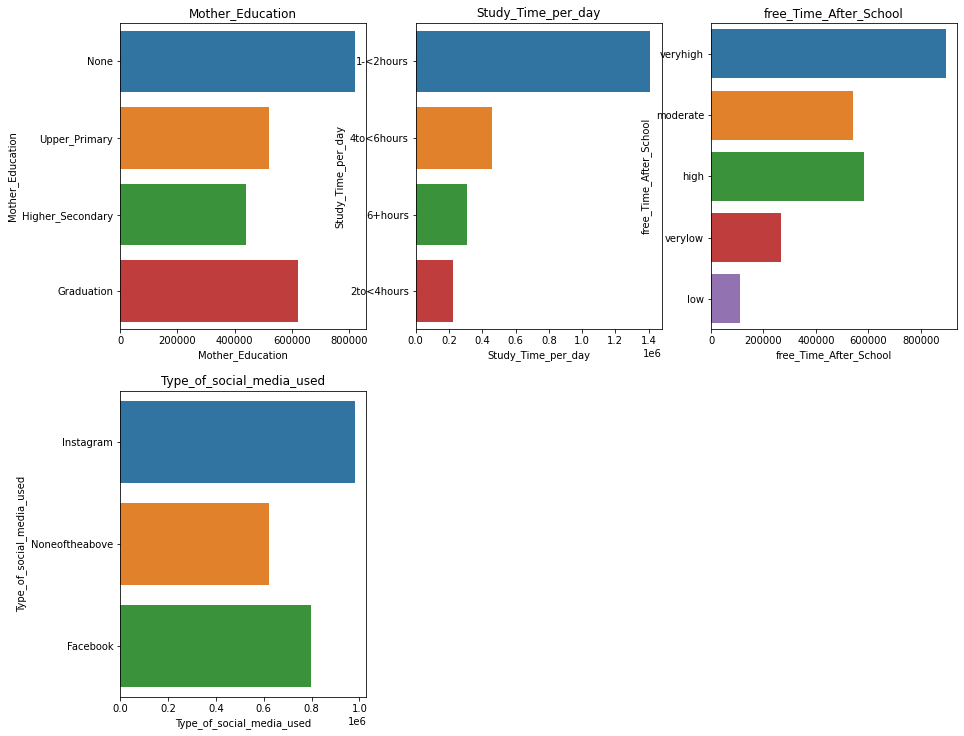

In [31]:
# plotting the categorical feature with therir count

plt.figure(figsize=(15,80),facecolor="white")
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature, data = df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber += 1
    
plt.show()

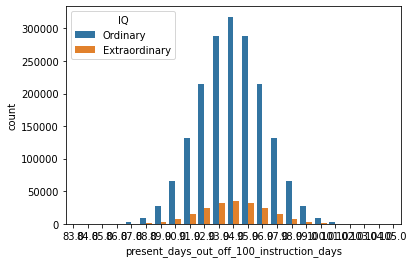

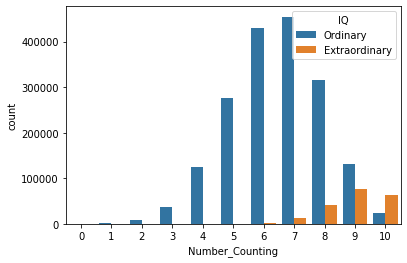

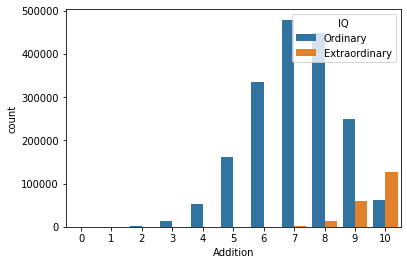

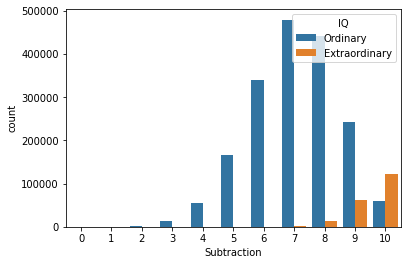

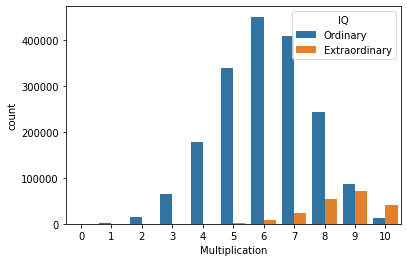

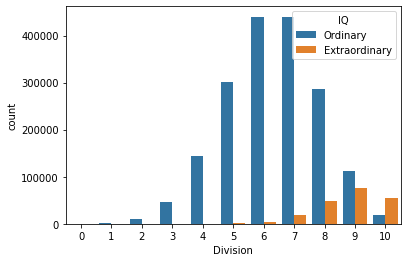

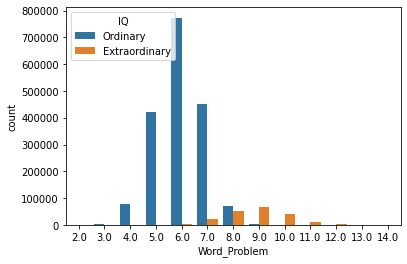

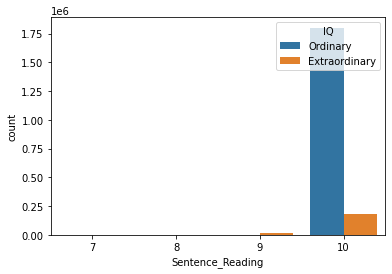

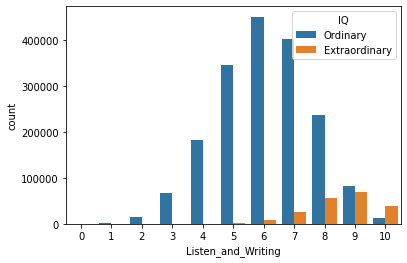

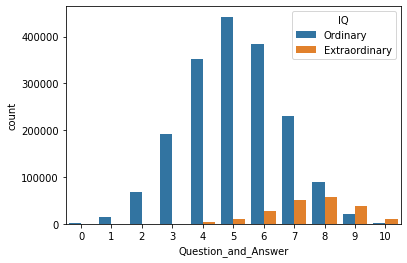

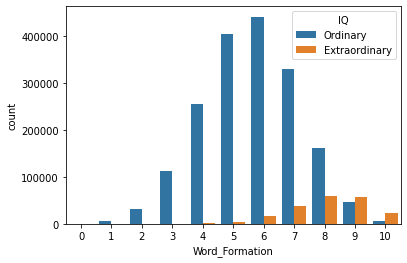

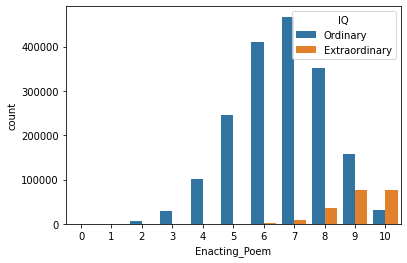

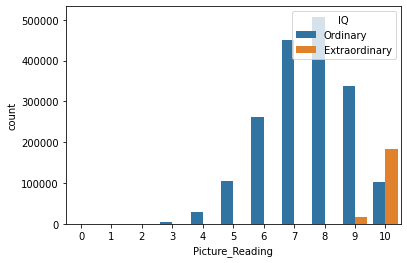

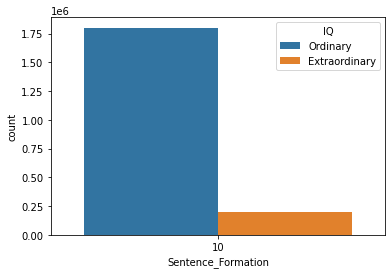

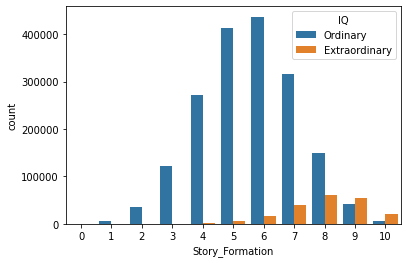

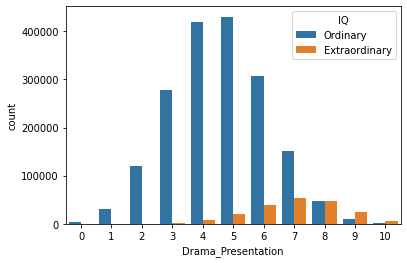

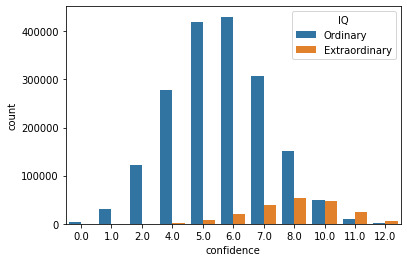

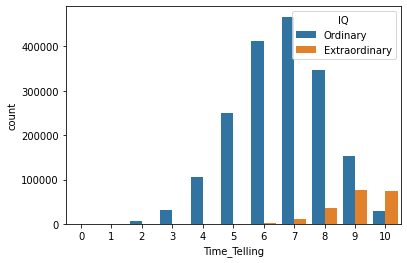

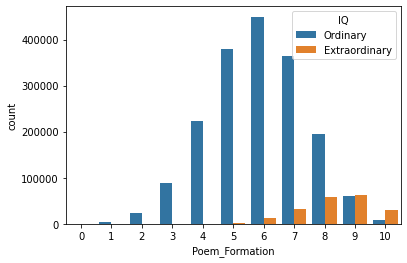

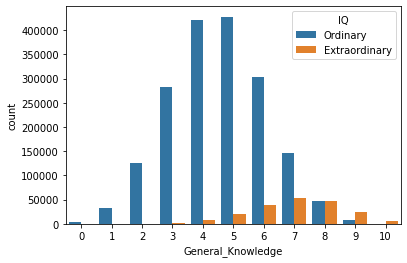

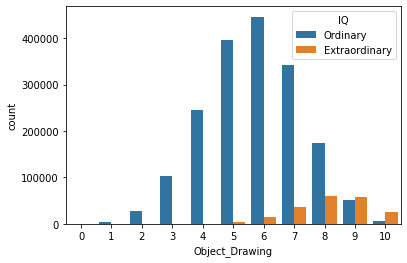

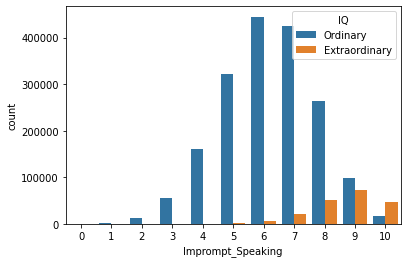

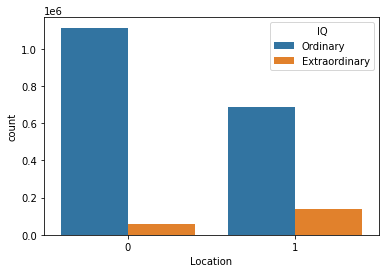

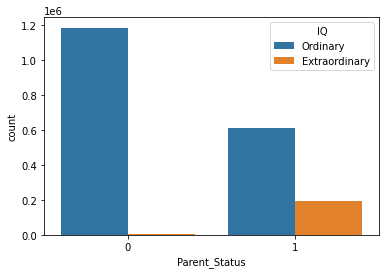

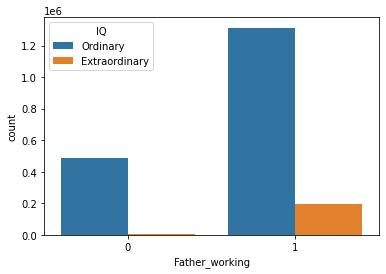

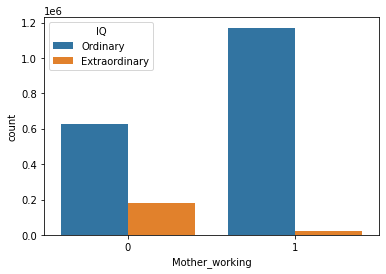

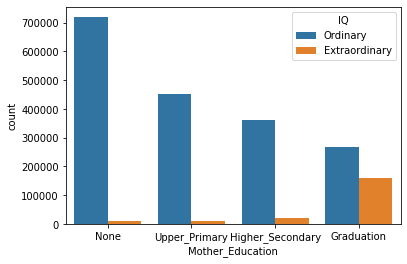

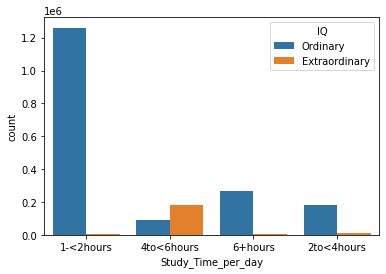

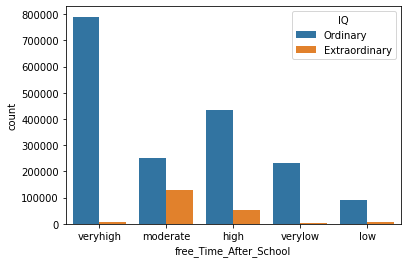

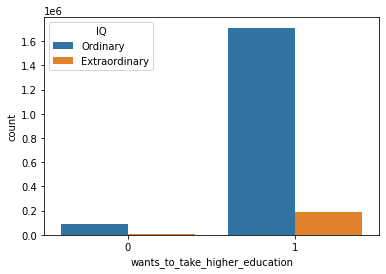

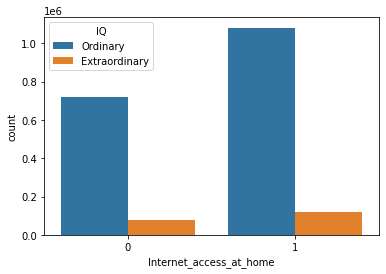

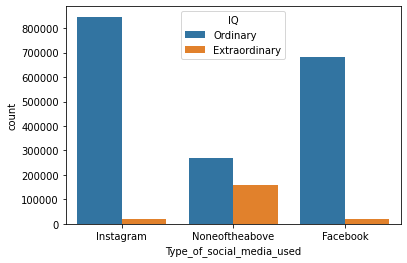

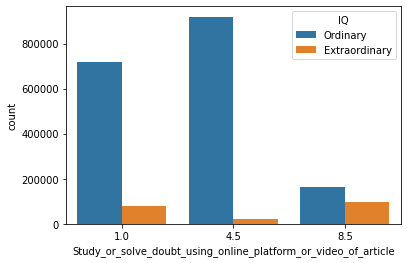

In [32]:
# plotting the each column count agains the IQ level

for i, pred in enumerate(df.drop("IQ",axis = 1)):
    plt.figure(i)
    sns.countplot(data=df, x = pred, hue="IQ")

#### Derived Insights

- The students those are present in school are having high IQ (extraordinary) level

- The students those are good in academic career are having High IQ as compared to students those are having less score in there academic career

- Mostly the Mothers which are non-educated are having high numbers of records

- Students are most likely study between 1 to 2 hours

- lots of student gets a huge free time after school so the educational officials should give some extra homework as well as some activity task on weekends to develop students IQ

- Type of social media used seems to be irrelevant

<AxesSubplot:xlabel='Number_Counting', ylabel='IQ'>

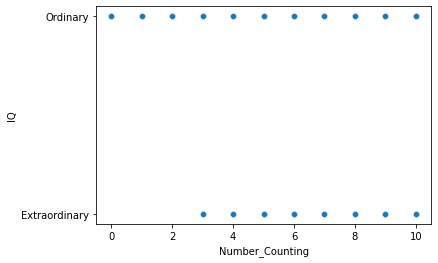

In [33]:
sns.scatterplot(x=df["Number_Counting"],y=df["IQ"])

- Here we can say that the student those having good score in number counting are Extraordinary

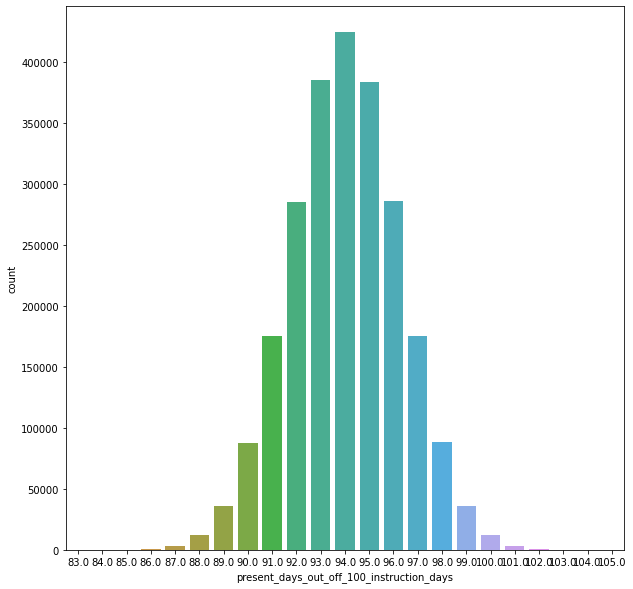

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(df['present_days_out_off_100_instruction_days'])
plt.show()

# All Dataframe Otliers checking

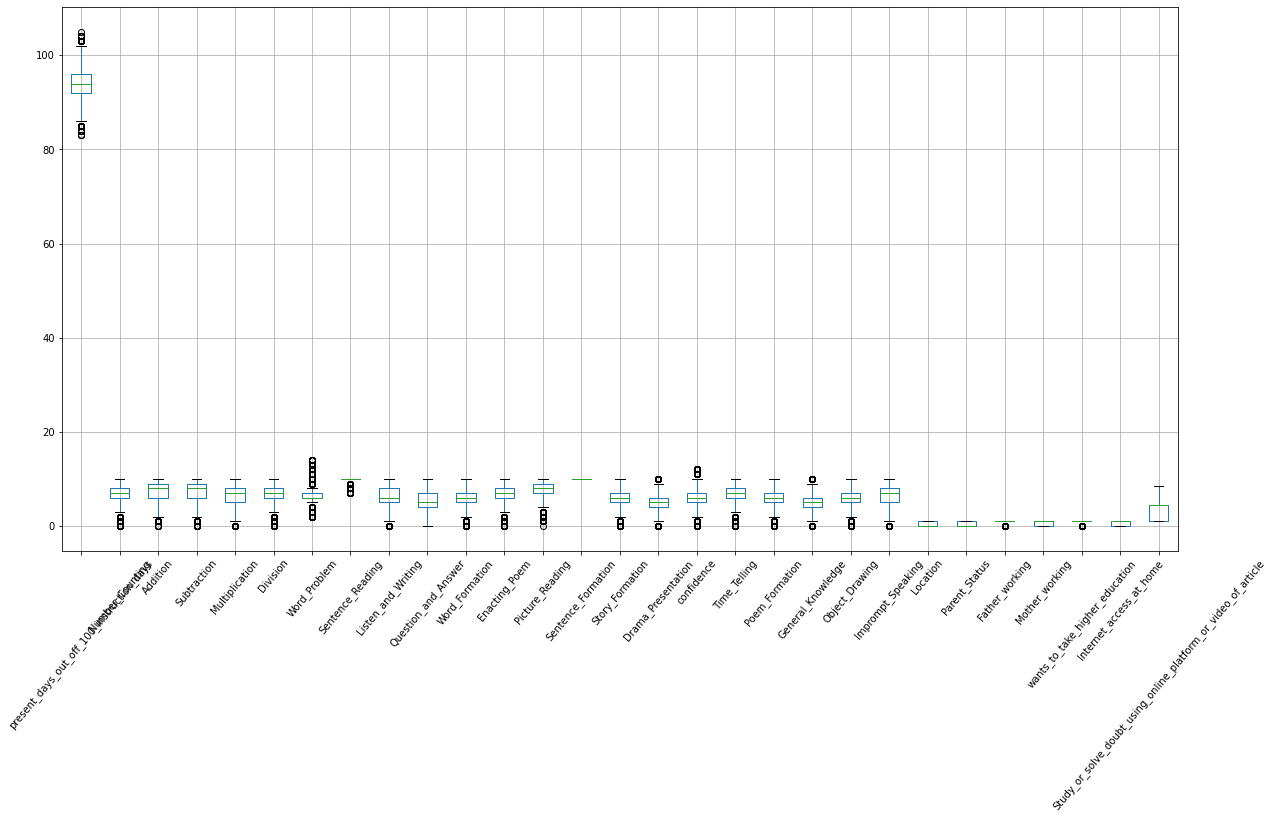

In [35]:
plt.figure(figsize=(20,10))
df.boxplot(rot=50)
plt.show()

## 2. Present Days Column

In [36]:
df["present_days_out_off_100_instruction_days"].dtype

dtype('float64')

In [37]:
df["present_days_out_off_100_instruction_days"].isna().sum().mean()

0.0

<AxesSubplot:xlabel='present_days_out_off_100_instruction_days'>

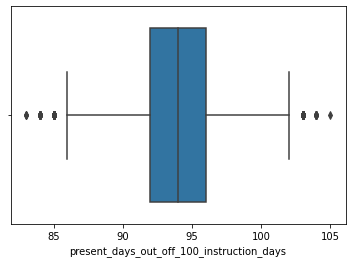

In [38]:
sns.boxplot(x = df["present_days_out_off_100_instruction_days"])

In [39]:
# as the maximum days are 100 so we have to consider the days which are greater than 100 as an Outliers

## 3. Number_Counting

In [40]:
# Score Between 0-10

In [41]:
df["Number_Counting"].dtype

dtype('int64')

In [42]:
df["Number_Counting"].isna().sum().mean()

0.0

<AxesSubplot:xlabel='Number_Counting'>

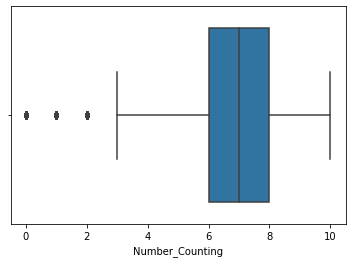

In [43]:
sns.boxplot(x = df["Number_Counting"])

## 4. Addition

In [44]:
# Score Between 0-10

In [45]:
df["Addition"].dtype

dtype('int64')

In [46]:
df["Addition"].isna().sum().mean()

0.0

<AxesSubplot:xlabel='Addition'>

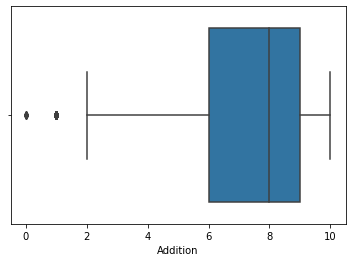

In [47]:
sns.boxplot(x = df["Addition"])

## 5. Subtraction

In [48]:
# Score Between 0-10

In [49]:
df["Subtraction"].dtype

dtype('int64')

In [50]:
df["Subtraction"].isna().sum().mean()

0.0

<AxesSubplot:xlabel='Subtraction'>

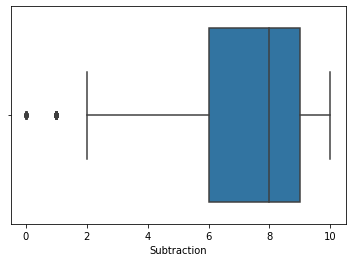

In [51]:
sns.boxplot(x = df["Subtraction"])

## 6. Multiplication

In [52]:
# Score Between 0-10

In [53]:
df["Multiplication"].dtype

dtype('int64')

In [54]:
df["Multiplication"].isna().sum().mean()

0.0

<AxesSubplot:xlabel='Multiplication'>

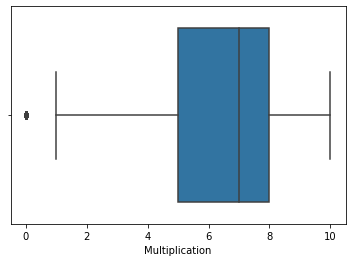

In [55]:
sns.boxplot(x = df["Multiplication"])

## 7. Division

In [56]:
# Score Between 0-10

In [57]:
df["Division"].dtype

dtype('int64')

In [58]:
df["Division"].isna().sum().mean()

0.0

<AxesSubplot:xlabel='Division'>

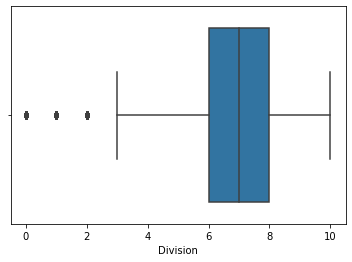

In [59]:
sns.boxplot(x = df["Division"])

## 8. Word_Problem

In [60]:
# Score Between 0-10

In [61]:
df["Word_Problem"].dtype

dtype('float64')

In [62]:
df["Word_Problem"].isna().sum().mean()

0.0

<AxesSubplot:xlabel='Word_Problem'>

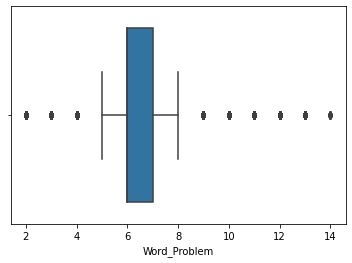

In [63]:
sns.boxplot(x = df["Word_Problem"])

In [64]:
# Here are some students those marks are greater than 10 which are wrong entered so we have to
# consider those as an Outliers

## 9. Sentence_Reading

In [65]:
# Score Between 0-10

In [66]:
df["Sentence_Reading"].dtype

dtype('int64')

In [67]:
df["Sentence_Reading"].isna().sum().mean()

0.0

<AxesSubplot:xlabel='Sentence_Reading'>

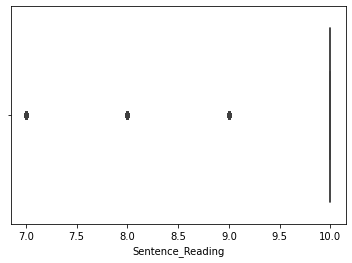

In [68]:
sns.boxplot(x = df["Sentence_Reading"])

## 10. Listen_and_Writing

In [69]:
# Score Between 0-10

In [70]:
df["Listen_and_Writing"].dtype

dtype('int64')

In [71]:
df["Listen_and_Writing"].isna().sum().mean()

0.0

<AxesSubplot:xlabel='Listen_and_Writing'>

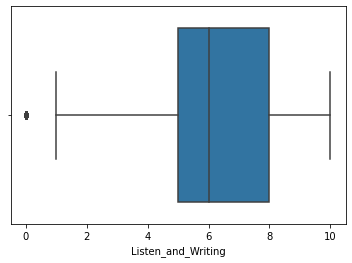

In [72]:
sns.boxplot(x = df["Listen_and_Writing"])

## 11. Question_and_Answer

In [73]:
# Score Between 0-10

In [74]:
df["Question_and_Answer"].dtype

dtype('int64')

In [75]:
df["Question_and_Answer"].isna().sum().mean()

0.0

<AxesSubplot:xlabel='Question_and_Answer'>

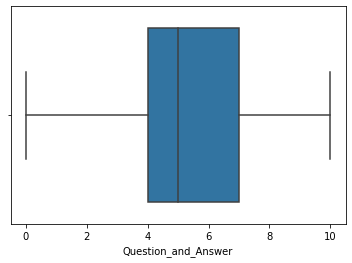

In [76]:
sns.boxplot(x = df["Question_and_Answer"])

## 12. Word_Formation

In [77]:
# Score Between 0-10

In [78]:
df["Word_Formation"].dtype

dtype('int64')

In [79]:
df["Word_Formation"].isna().sum()

0

<AxesSubplot:xlabel='Word_Formation'>

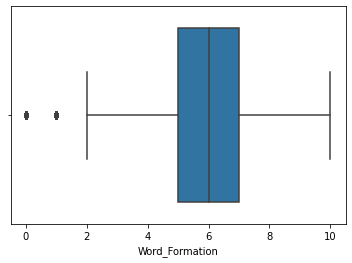

In [80]:
sns.boxplot(x = df["Word_Formation"])

## 13. Enacting_Poem

In [81]:
# Score Between 0-10

In [82]:
df["Enacting_Poem"].dtype

dtype('int64')

In [83]:
df["Enacting_Poem"].isna().sum()

0

<AxesSubplot:xlabel='Enacting_Poem'>

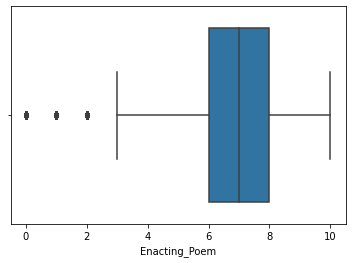

In [84]:
sns.boxplot(x = df["Enacting_Poem"])

## 14. Picture_Reading

In [85]:
# Score Between 0-10

In [86]:
df["Picture_Reading"].dtype

dtype('int64')

In [87]:
df["Picture_Reading"].isna().sum()

0

<AxesSubplot:xlabel='Picture_Reading'>

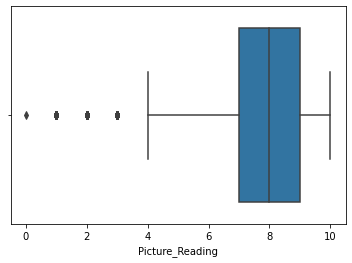

In [88]:
sns.boxplot(x = df["Picture_Reading"])

## 15. Sentence_Formation 

In [89]:
# Score Between 0-10

In [90]:
df["Sentence_Formation"].dtype

dtype('int64')

In [91]:
df["Sentence_Formation"].isna().sum()

0

<AxesSubplot:xlabel='Sentence_Formation'>

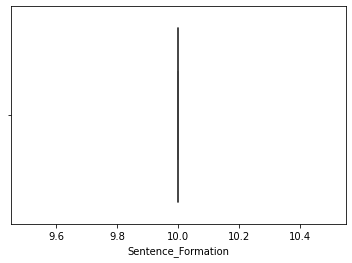

In [92]:
sns.boxplot(x = df["Sentence_Formation"])

<AxesSubplot:xlabel='Sentence_Formation'>

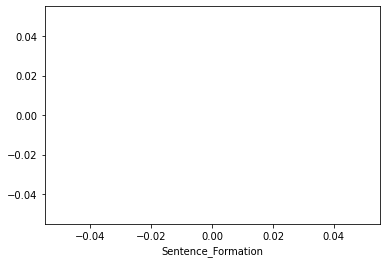

In [93]:
sns.scatterplot(df["Sentence_Formation"])

<AxesSubplot:xlabel='Sentence_Formation', ylabel='count'>

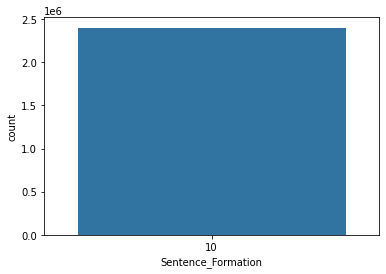

In [94]:
sns.countplot(df["Sentence_Formation"])

In [95]:
df["Sentence_Formation"].value_counts()

10    2400000
Name: Sentence_Formation, dtype: int64

- As there is only single value in Sentence Formation Feature So we must have to drop it from Dataframe because it will not contribute anything to predict the target column beacause model will not learn anything from single value

## 16. Story_Formation

In [96]:
# Score Between 0-10

In [97]:
df["Story_Formation"].dtype

dtype('int64')

In [98]:
df["Story_Formation"].isna().sum()

0

<AxesSubplot:xlabel='Story_Formation'>

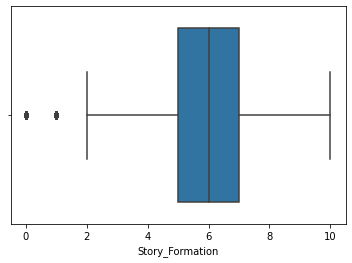

In [99]:
sns.boxplot(x = df["Story_Formation"])

## 17. Drama_Presentation

In [100]:
# Score Between 0-10

In [101]:
df["Drama_Presentation"].dtype

dtype('int64')

In [102]:
df["Drama_Presentation"].isna().sum()

0

<AxesSubplot:xlabel='Drama_Presentation'>

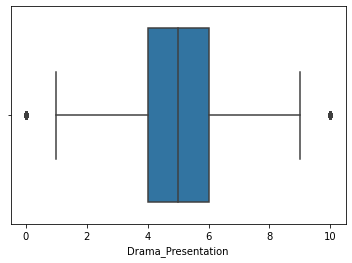

In [103]:
sns.boxplot(x = df["Drama_Presentation"])

## 18. confidence

In [104]:
# Score Between 0-10

In [105]:
df["confidence"].dtype

dtype('float64')

In [106]:
df["confidence"].isna().sum()

0

<AxesSubplot:xlabel='confidence'>

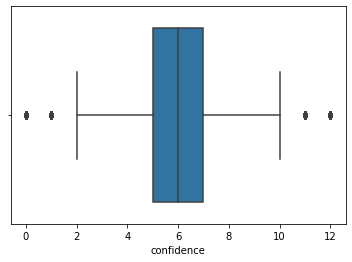

In [107]:
sns.boxplot(x = df["confidence"])

In [108]:
# Here also some student have more than 10 marks in confidence so we have to consider those as an outliers

## 19. Time_Telling

In [109]:
# Score Between 0-10

In [110]:
df["Time_Telling"].dtype

dtype('int64')

In [111]:
df["Time_Telling"].isna().sum()

0

<AxesSubplot:xlabel='Time_Telling'>

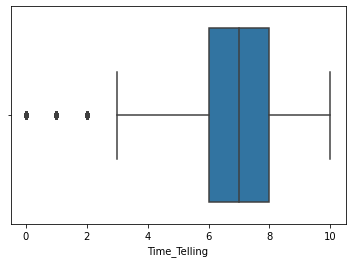

In [112]:
sns.boxplot(x = df["Time_Telling"])

## 20. Poem_Formation

In [113]:
# Score Between 0-10

In [114]:
df["Poem_Formation"].dtype

dtype('int64')

In [115]:
df["Poem_Formation"].isna().sum()

0

<AxesSubplot:xlabel='Poem_Formation'>

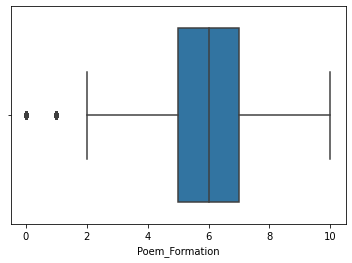

In [116]:
sns.boxplot(x = df["Poem_Formation"])

## 21. General_Knowledge

In [117]:
# Score Between 0-10

In [118]:
df["General_Knowledge"].dtype

dtype('int64')

In [119]:
df["General_Knowledge"].isna().sum()

0

<AxesSubplot:xlabel='General_Knowledge'>

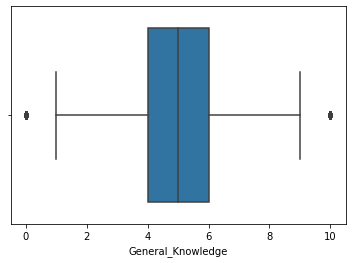

In [120]:
sns.boxplot(x = df["General_Knowledge"])

## 22. Object_Drawing

In [121]:
# Score Between 0-10

In [122]:
df["Object_Drawing"].dtype

dtype('int64')

In [123]:
df["Object_Drawing"].isna().sum()

0

<AxesSubplot:xlabel='Object_Drawing'>

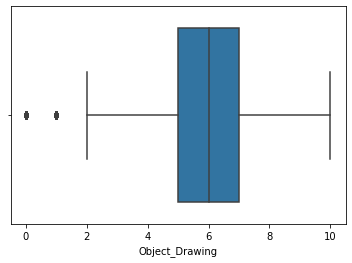

In [124]:
sns.boxplot(x = df["Object_Drawing"])

## 23. Imprompt_Speaking

In [125]:
# Score Between 0-10

In [126]:
df["Imprompt_Speaking"].dtype

dtype('int64')

In [127]:
df["Imprompt_Speaking"].isna().sum()

0

<AxesSubplot:xlabel='Imprompt_Speaking'>

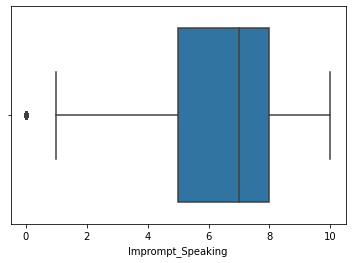

In [128]:
sns.boxplot(x = df["Imprompt_Speaking"])

## 24. Location

In [129]:
df["Location"].dtype

dtype('int64')

In [130]:
df["Location"].value_counts().to_dict()

{0: 1358730, 1: 1041270}

In [131]:
# 1 >> Urban  ////  0 >> Rural

In [132]:
df["Imprompt_Speaking"].isna().sum()

0

## 25. Parent_Status

In [133]:
df["Parent_Status"].dtype

dtype('int64')

In [134]:
df["Parent_Status"].value_counts().to_dict()

{0: 1326158, 1: 1073842}

In [135]:
# Apart >> 0  ////  Living together >> 1

In [136]:
df["Parent_Status"].isna().sum()

0

## 26. Father_working

In [137]:
df["Father_working"].dtype

dtype('int64')

In [138]:
df["Father_working"].value_counts().to_dict()

{1: 1846198, 0: 553802}

In [139]:
# Nothing mentioned in description so i consider 1 as WORKING and 0 as NON_WORKING

In [140]:
df["Father_working"].isna().sum()

0

## 27. Mother_working

In [141]:
df["Mother_working"].dtype

dtype('int64')

In [142]:
df["Father_working"].value_counts().to_dict()

{1: 1846198, 0: 553802}

In [143]:
# 1 as WORKING and 0 as NON_WORKING

In [144]:
df["Mother_working"].isna().sum()

0

## 28. Mother_Education

In [145]:
df["Mother_Education"].dtype

dtype('O')

In [146]:
df["Mother_Education"].value_counts().to_dict()

{'None': 819163,
 'Graduation': 619678,
 'Upper_Primary': 521148,
 'Higher_Secondary': 440011}

In [147]:
# This Is a catagorical column and has some order so we can handle it by using Lable encoding

## 29. Study_Time_per_day

In [148]:
df["Study_Time_per_day"].dtype

dtype('O')

In [149]:
df["Study_Time_per_day"].value_counts().to_dict()

{'1-<2hours': 1408695,
 '4to<6hours': 460203,
 '6+hours': 307696,
 '2to<4hours': 223406}

In [150]:
# This Is a catagorical column and has some order so we can handle it by using Lable encoding

## 30. free_Time_After_School

In [151]:
df["free_Time_After_School"].dtype

dtype('O')

In [152]:
df["free_Time_After_School"].value_counts().to_dict()

{'veryhigh': 894691,
 'high': 585128,
 'moderate': 540907,
 'verylow': 267678,
 'low': 111596}

In [153]:
# This Is a catagorical column and has some order so we can handle it by using Lable encoding

## 31. wants_to_take_higher_education

In [154]:
df["wants_to_take_higher_education"].dtype

dtype('int64')

In [155]:
df["wants_to_take_higher_education"].value_counts().to_dict()

{1: 2279904, 0: 120096}

In [156]:
# 1 for YES and 0 for NO

In [157]:
df["wants_to_take_higher_education"].isna().sum()

0

## 32. Internet_access_at_home

In [158]:
df["Internet_access_at_home"].dtype

dtype('int64')

In [159]:
df["Internet_access_at_home"].value_counts().to_dict()

{1: 1440227, 0: 959773}

In [160]:
# 1 for YES and 0 for NO

In [161]:
df["Internet_access_at_home"].isna().sum()

0

## 33. Type_of_social_media_used 

In [162]:
df["Type_of_social_media_used"].dtype

dtype('O')

In [163]:
df["Type_of_social_media_used"].value_counts().to_dict()

{'Instagram': 980149, 'Facebook': 799133, 'Noneoftheabove': 620718}

## 34. Study_or_solve_doubt_using_online_platform_or_video_of_article

In [164]:
# Score Between 0-10

In [165]:
df["Study_or_solve_doubt_using_online_platform_or_video_of_article"].dtype

dtype('float64')

In [166]:
df["Study_or_solve_doubt_using_online_platform_or_video_of_article"].isna().sum()

0

<AxesSubplot:xlabel='Study_or_solve_doubt_using_online_platform_or_video_of_article'>

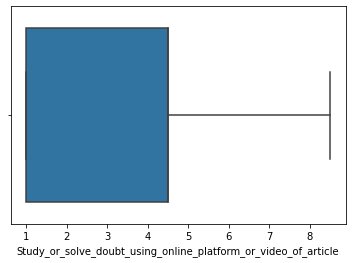

In [167]:
sns.boxplot(x = df["Study_or_solve_doubt_using_online_platform_or_video_of_article"])

## 35. IQ

In [168]:
df["IQ"].dtype

dtype('O')

In [169]:
df["IQ"].value_counts().to_dict()

{'Ordinary': 1800000, 'Extraordinary': 200000}

In [170]:
# we have to concider Ordinary as 0 and Extraordinary as 1+++6

## Feature Engineering

## 1. Present Days Column

In [171]:
df["present_days_out_off_100_instruction_days"].loc[df["present_days_out_off_100_instruction_days"].values>100]

86        101.0
100       101.0
294       101.0
424       101.0
466       102.0
          ...  
395916    101.0
397393    101.0
397582    101.0
397807    101.0
398826    101.0
Name: present_days_out_off_100_instruction_days, Length: 4370, dtype: float64

In [172]:
# calculating the percentage of outliers in Dataframe by formula (len(outliers) / len(df)) * 100

(3640 / df.shape[0])*100

0.15166666666666667

In [173]:
# As there are 0.151% outliers so we can handle it by using univariate imputation techniques

In [174]:
# now we are calculating the mean of values which are having days less than 100 (remaining values rather than outliers)
days_mean = df["present_days_out_off_100_instruction_days"].loc[df["present_days_out_off_100_instruction_days"].values<100].mean()
days_mean

93.95662396542168

In [175]:
# now we are imputing those values with mean

df["present_days_out_off_100_instruction_days"].loc[df["present_days_out_off_100_instruction_days"] > 100]=days_mean.round()

In [176]:
# checking for values are they replaced or not with there index number

df["present_days_out_off_100_instruction_days"].iloc[[86,100,397393,397807,398826]]

86        94.0
100       94.0
397393    93.0
397807    97.0
398826    96.0
Name: present_days_out_off_100_instruction_days, dtype: float64

## 2. Number_Counting

In [177]:
# Hence there are no outliers and missing values so we continued

## 3. Addition

In [178]:
# Hence there are no outliers and missing values so we continued

## 4. Subtraction

In [179]:
# Hence there are no outliers and missing values so we continued

## 5. Multiplication

In [180]:
# Hence there are no outliers and missing values so we continued

## 6. Division

In [181]:
# Hence there are no outliers and missing values so we continued

## 7. Word_Problem

In [182]:
df["Word_Problem"].iloc[np.where(df["Word_Problem"].values > 10)]

32        12.0
154       11.0
261       11.0
302       11.0
336       11.0
          ... 
399875    11.0
399931    11.0
399938    11.0
399985    11.0
399991    12.0
Name: Word_Problem, Length: 27044, dtype: float64

In [183]:
# calculating the percentage of outliers in Dataframe by formula (len(outliers) / len(df)) * 100

(13522 / df.shape[0])*100

0.5634166666666667

In [184]:
# As there are 0.563% outliers so we can handle it by using univariate imputation techniques

In [185]:
# now we are calculating the mean of values which are having days less than 100 (remaining values rather than outliers)
word_mean = df["Word_Problem"].iloc[np.where(df["Word_Problem"].values<10)].mean()
word_mean

6.282717923219846

In [186]:
# now we are imputing those values with mean

df["Word_Problem"].iloc[np.where(df["Word_Problem"].values >10)] = word_mean.round()

In [187]:
# checking for values are they replaced or not with there index number

df["Word_Problem"][[32,302,1998328,1998995,1999901]]

32         6.0
32         9.0
302        6.0
302        5.0
1998328    6.0
1998995    6.0
1999901    6.0
Name: Word_Problem, dtype: float64

## 8. Sentence_Reading

In [188]:
# Hence there are no outliers and missing values so we continued

## 9. Listen_and_Writing

In [189]:
# Hence there are no outliers and missing values so we continued

## 10. Question_and_Answer

In [190]:
# Hence there are no outliers and missing values so we continued

## 11. Word_Formation

In [191]:
# Hence there are no outliers and missing values so we continued

## 12. Enacting_Poem

In [192]:
# Hence there are no outliers and missing values so we continued

## 13. Picture_Reading

In [193]:
# Hence there are no outliers and missing values so we continued

## 14. Sentence_Formation

##### As there is only single value in Sentence Formation Feature so we should have to drop it

In [194]:
df.drop("Sentence_Formation", axis =1, inplace = True)

In [195]:
df.shape

(2400000, 33)

## 15. Story_Formation

In [196]:
# Hence there are no outliers and missing values so we continued

## 16. Drama_Presentation

In [197]:
# Hence there are no outliers and missing values so we continued

## 17. confidence

In [198]:
df["confidence"].iloc[np.where(df["confidence"].values > 10)]

32        11.0
40        11.0
48        11.0
79        11.0
84        12.0
          ... 
399978    11.0
399979    12.0
399981    11.0
399983    11.0
399985    11.0
Name: confidence, Length: 72893, dtype: float64

In [199]:
# calculating the percentage of outliers in Dataframe by formula (len(outliers) / len(df)) * 100

(40915 / df.shape[0])*100

1.7047916666666667

In [200]:
# As there are 2.04% outliers so we can handle it by using univariate imputation techniques

In [201]:
# now we are calculating the mean of values which are having days less than 100 (remaining values rather than outliers)
conf_mean = df["confidence"].iloc[np.where(df["confidence"].values<10)].mean()
conf_mean

5.599112385295835

In [202]:
# now we are imputing those values with mean

df["confidence"].iloc[np.where(df["confidence"].values >10)] = conf_mean.round()

In [203]:
# checking for values are they replaced or not with there index number

df["confidence"][[32,84,1999822,1999972,1999995]]

32         6.0
32         7.0
84         6.0
84         6.0
1999822    6.0
1999972    6.0
1999995    6.0
Name: confidence, dtype: float64

## 18. Time_Telling

In [204]:
# Hence there are no outliers and missing values so we continued

## 19. Poem_Formation

In [205]:
# Hence there are no outliers and missing values so we continued

## 20. General_Knowledge

In [206]:
# Hence there are no outliers and missing values so we continued

## 21. Object_Drawing

In [207]:
# Hence there are no outliers and missing values so we continued

## 22. Imprompt_Speaking

In [208]:
# Hence there are no outliers and missing values so we continued

## 23. Location

In [209]:
# Hence there are no outliers and missing values so we continued

## 24. Parent_Status

In [210]:
# Hence there are no outliers and missing values so we continued

## 25. Father_working

In [211]:
# Hence there are no outliers and missing values so we continued

## 26. Mother_working

In [212]:
# Hence there are no outliers and missing values so we continued

## 27. Mother_Education

In [213]:
df["Mother_Education"].value_counts().to_dict()

{'None': 819163,
 'Graduation': 619678,
 'Upper_Primary': 521148,
 'Higher_Secondary': 440011}

In [214]:
# As there is order in data so we are going with ordinal encoding

df["Mother_Education"].replace({'None':0,'Upper_Primary':1,
                                 'Graduation': 3,'Higher_Secondary':2}, inplace=True)
df["Mother_Education"]

0         0
1         1
2         2
3         1
4         1
         ..
399995    3
399996    3
399997    3
399998    3
399999    3
Name: Mother_Education, Length: 2400000, dtype: int64

## 28. Study_Time_per_day

In [215]:
df["Study_Time_per_day"].dtype

dtype('O')

In [216]:
df["Study_Time_per_day"].value_counts().to_dict()

{'1-<2hours': 1408695,
 '4to<6hours': 460203,
 '6+hours': 307696,
 '2to<4hours': 223406}

In [217]:
# as there is order in data so we can imput it by using ordinal encoding

df["Study_Time_per_day"].replace({'1-<2hours': 0,
                                     '6+hours': 3,
                                     '4to<6hours': 2,
                                     '2to<4hours': 1}, inplace=True)
df["Study_Time_per_day"]

0         0
1         2
2         3
3         0
4         3
         ..
399995    0
399996    2
399997    2
399998    2
399999    2
Name: Study_Time_per_day, Length: 2400000, dtype: int64

## 29. free_Time_After_School

In [218]:
df["free_Time_After_School"].dtype

dtype('O')

In [219]:
df["free_Time_After_School"].value_counts().to_dict()

{'veryhigh': 894691,
 'high': 585128,
 'moderate': 540907,
 'verylow': 267678,
 'low': 111596}

In [220]:
# as there is order in data so we can imput it by using ordinal encoding

df["free_Time_After_School"].replace({'veryhigh': 4,
                                         'high': 3,
                                         'moderate': 2,
                                         'verylow': 0,
                                         'low': 1}, inplace=True)
df["free_Time_After_School"]

0         4
1         2
2         4
3         3
4         4
         ..
399995    2
399996    2
399997    4
399998    2
399999    2
Name: free_Time_After_School, Length: 2400000, dtype: int64

## 30. wants_to_take_higher_education

In [221]:
# Hence there are no outliers and missing values so we continued

## 31. Internet_access_at_home

In [222]:
# Hence there are no outliers and missing values so we continued

## 32. Type_of_social_media_used

In [223]:
df["Type_of_social_media_used"]

0              Instagram
1         Noneoftheabove
2               Facebook
3              Instagram
4         Noneoftheabove
               ...      
399995    Noneoftheabove
399996    Noneoftheabove
399997    Noneoftheabove
399998    Noneoftheabove
399999    Noneoftheabove
Name: Type_of_social_media_used, Length: 2400000, dtype: object

In [224]:
df["Type_of_social_media_used"].value_counts().to_dict()

{'Instagram': 980149, 'Facebook': 799133, 'Noneoftheabove': 620718}

#### Type Of social Media used feature seems to be does not play important role as there is no category or any order which can drop

In [225]:
df.drop('Type_of_social_media_used',axis = 1, inplace=True)

In [226]:
df.shape

(2400000, 32)

## 33. Study_or_solve_doubt_using_online_platform_or_video_of_article

In [227]:
# Hence there are no outliers and missing values so we continued

## 33. IQ

In [228]:
df["IQ"].dtype

dtype('O')

In [229]:
df["IQ"].value_counts().to_dict()

{'Ordinary': 1800000, 'Extraordinary': 200000}

In [230]:
# We are considering Ordinary as 0 and Extraordinary as 1

df["IQ"].replace({"Ordinary": 0, 'Extraordinary': 1},inplace=True)
df["IQ"]

0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
399995    NaN
399996    NaN
399997    NaN
399998    NaN
399999    NaN
Name: IQ, Length: 2400000, dtype: float64

<AxesSubplot:xlabel='IQ', ylabel='count'>

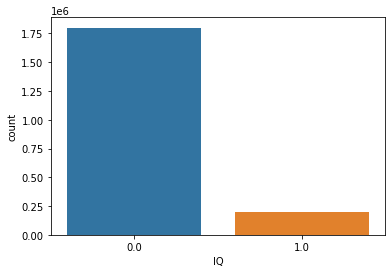

In [231]:
sns.countplot(df["IQ"])

##### here is problem of class imbalancing so we have to overcome imbalancing also

In [232]:
df

,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,Question_and_Answer,...,Parent_Status,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Study_or_solve_doubt_using_online_platform_or_video_of_article,IQ
0,97.0,8,6,5,5,6,6.0,10,8,4,...,0,1,0,0,0,4,1,0,1.0,0.0
1,96.0,8,10,10,8,10,9.0,10,7,6,...,1,1,0,1,2,2,0,1,8.5,1.0
2,96.0,7,9,6,5,6,6.0,10,6,5,...,0,1,1,2,3,4,1,0,1.0,0.0
3,91.0,7,6,7,8,8,7.0,10,4,7,...,0,1,1,1,0,3,1,1,4.5,0.0
4,90.0,8,5,6,4,7,6.0,10,5,4,...,0,1,1,1,3,4,1,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,95.0,9,8,10,10,9,7.0,10,7,9,...,1,1,1,3,0,2,0,1,8.5,NaN
399996,95.0,8,9,10,6,9,8.0,10,8,7,...,1,1,0,3,2,2,1,1,8.5,NaN
399997,95.0,9,10,8,10,8,8.0,10,7,5,...,1,1,0,3,2,4,1,0,1.0,NaN
399998,92.0,9,9,10,10,8,10.0,10,9,9,...,1,1,0,3,2,2,1,1,8.5,NaN


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column                                                          Dtype  
---  ------                                                          -----  
 0   present_days_out_off_100_instruction_days                       float64
 1   Number_Counting                                                 int64  
 2   Addition                                                        int64  
 3   Subtraction                                                     int64  
 4   Multiplication                                                  int64  
 5   Division                                                        int64  
 6   Word_Problem                                                    float64
 7   Sentence_Reading                                                int64  
 8   Listen_and_Writing                                              int64  
 9   Question_and_Answer                 

In [234]:
df.isna().sum()

present_days_out_off_100_instruction_days                              0
Number_Counting                                                        0
Addition                                                               0
Subtraction                                                            0
Multiplication                                                         0
Division                                                               0
Word_Problem                                                           0
Sentence_Reading                                                       0
Listen_and_Writing                                                     0
Question_and_Answer                                                    0
Word_Formation                                                         0
Enacting_Poem                                                          0
Picture_Reading                                                        0
Story_Formation                                    

## Train Test Split Of Dataset

In [235]:
x = df[:2000000].drop("IQ",axis=1)
y = df["IQ"][:2000000]

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=22,stratify=y)

## Handling Imbalancing of Data By SMOTE technique

In [236]:
sm = SMOTE(random_state=12)
x_train_smote, y_train_smote = sm.fit_resample(x_train,y_train)

In [237]:
x_train_smote

,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,Question_and_Answer,...,Location,Parent_Status,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Study_or_solve_doubt_using_online_platform_or_video_of_article
0,98.000000,5,6,7,7,6,6.000000,10,6,4,...,1,1,0,1,3,3,0,1,1,8.5
1,95.000000,6,7,9,6,6,6.000000,10,6,7,...,1,1,1,1,3,3,2,1,0,1.0
2,93.000000,8,7,7,5,6,6.000000,10,7,4,...,0,0,0,0,0,0,3,1,0,1.0
3,94.000000,7,7,4,6,7,6.000000,10,5,8,...,0,0,1,0,0,3,4,1,0,1.0
4,97.000000,8,4,4,8,7,7.000000,10,3,3,...,1,0,1,0,2,0,0,1,1,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879995,90.002542,9,10,10,8,9,9.002542,10,10,8,...,1,1,1,0,1,1,2,1,0,1.0
2879996,94.000000,9,8,10,8,9,10.000000,10,9,7,...,1,1,1,0,3,2,2,1,1,8.5
2879997,94.000000,10,9,10,9,9,8.233117,10,9,7,...,1,1,1,0,3,2,2,1,0,1.0
2879998,94.926243,9,9,10,7,9,6.073757,10,7,9,...,0,1,1,0,2,2,2,0,0,1.0


In [238]:
x_train_smote.shape

(2880000, 31)

<AxesSubplot:xlabel='IQ', ylabel='count'>

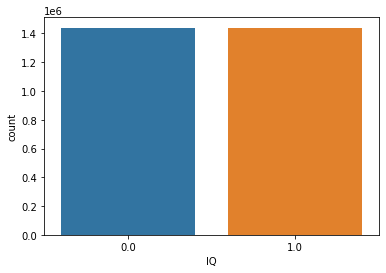

In [239]:
sns.countplot(y_train_smote)

In [240]:
y_train_smote.value_counts()

0.0    1440000
1.0    1440000
Name: IQ, dtype: int64

# Training Model with Logistic Regression

## Model Training

In [241]:
log_clf = LogisticRegression()
log_clf.fit(x_train_smote, y_train_smote)

LogisticRegression()

## Training Dataset Evaluation

#### Training Data Evaluation

Confusion Matrix :
 [[1439949      51]
 [     22 1439978]]
clf_report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1440000
         1.0       1.00      1.00      1.00   1440000

    accuracy                           1.00   2880000
   macro avg       1.00      1.00      1.00   2880000
weighted avg       1.00      1.00      1.00   2880000

Accuracy Score is :
 0.9999746527777778


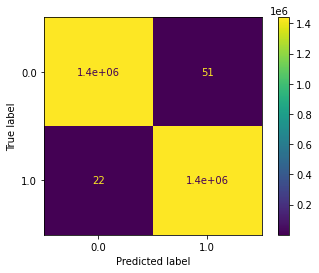

In [242]:
y_pred_train = log_clf.predict(x_train_smote)

cnf_matrix = confusion_matrix(y_train_smote, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

plot_confusion_matrix(log_clf,x_train_smote, y_train_smote)

clf_report = classification_report(y_train_smote, y_pred_train)
print("clf_report :\n",clf_report)

acc_score = accuracy_score(y_train_smote, y_pred_train)
print("Accuracy Score is :\n", acc_score)

#### Testing Data (of Training) Evaluation

Confusion Matrix :
 [[359990     10]
 [     0  40000]]
clf_report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    360000
         1.0       1.00      1.00      1.00     40000

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000

Accuracy Score is :
 0.999975


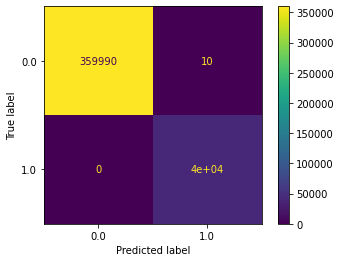

In [243]:
y_pred = log_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

plot_confusion_matrix(log_clf,x_test, y_test)

clf_report = classification_report(y_test, y_pred)
print("clf_report :\n",clf_report)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :\n", acc_score)

- Here we get 100% Of accuracy for all the evaluation metrics hence the model is overfitted

- So we are going with feature selection techniques to avoid time and space complexity of our model as well as to reducing the overfitting

- And then we will move towards complex models

#### First we will check correlation

In [244]:
df[:2000000].corr()

,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,Question_and_Answer,...,Parent_Status,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Study_or_solve_doubt_using_online_platform_or_video_of_article,IQ
present_days_out_off_100_instruction_days,1.000000,0.000409,-0.000492,-0.000047,0.000417,-0.000828,-0.000062,-0.000220,-0.000776,-0.000285,...,0.000115,0.001238,0.000056,0.000044,-0.000612,0.000069,0.000931,0.000677,0.000816,-0.000469
Number_Counting,0.000409,1.000000,0.206805,0.205096,0.191778,0.193859,0.624642,-0.122205,0.191102,0.186190,...,0.172749,0.074435,-0.148169,0.177239,0.149981,-0.052555,-0.000331,-0.000129,0.083096,0.442828
Addition,-0.000492,0.206805,1.000000,0.216991,0.202375,0.204927,0.283113,-0.128405,0.200810,0.194911,...,0.182489,0.077872,-0.157366,0.187330,0.158781,-0.055980,0.000168,-0.000015,0.087789,0.466164
Subtraction,-0.000047,0.205096,0.216991,1.000000,0.201884,0.205439,0.282197,-0.127667,0.201621,0.196571,...,0.181658,0.076571,-0.156994,0.187296,0.156507,-0.056218,-0.000187,0.000907,0.088497,0.464772
Multiplication,0.000417,0.191778,0.202375,0.201884,1.000000,0.191007,0.628673,-0.119846,0.187781,0.182290,...,0.169590,0.072790,-0.144618,0.173887,0.146997,-0.051298,0.000450,-0.000605,0.081362,0.433699
Division,-0.000828,0.193859,0.204927,0.205439,0.191007,1.000000,0.627512,-0.121586,0.189037,0.185450,...,0.170666,0.072611,-0.146771,0.177087,0.149260,-0.053229,-0.000070,-0.000493,0.082812,0.438940
Word_Problem,-0.000062,0.624642,0.283113,0.282197,0.628673,0.627512,1.000000,-0.166526,0.261818,0.255599,...,0.236236,0.101362,-0.202531,0.243403,0.205536,-0.072298,0.000114,-0.000940,0.113517,0.606220
Sentence_Reading,-0.000220,-0.122205,-0.128405,-0.127667,-0.119846,-0.121586,-0.166526,1.000000,-0.118980,-0.116245,...,-0.107885,-0.045764,0.092551,-0.110551,-0.093345,0.033289,-0.000524,-0.000327,-0.052664,-0.275694
Listen_and_Writing,-0.000776,0.191102,0.200810,0.201621,0.187781,0.189037,0.261818,-0.118980,1.000000,0.181014,...,0.170153,0.071982,-0.145012,0.173929,0.146434,-0.051858,0.000519,0.000267,0.082154,0.432019
Question_and_Answer,-0.000285,0.186190,0.194911,0.196571,0.182290,0.185450,0.255599,-0.116245,0.181014,1.000000,...,0.163679,0.070587,-0.140918,0.169920,0.142850,-0.051129,-0.000732,0.000112,0.079313,0.420352


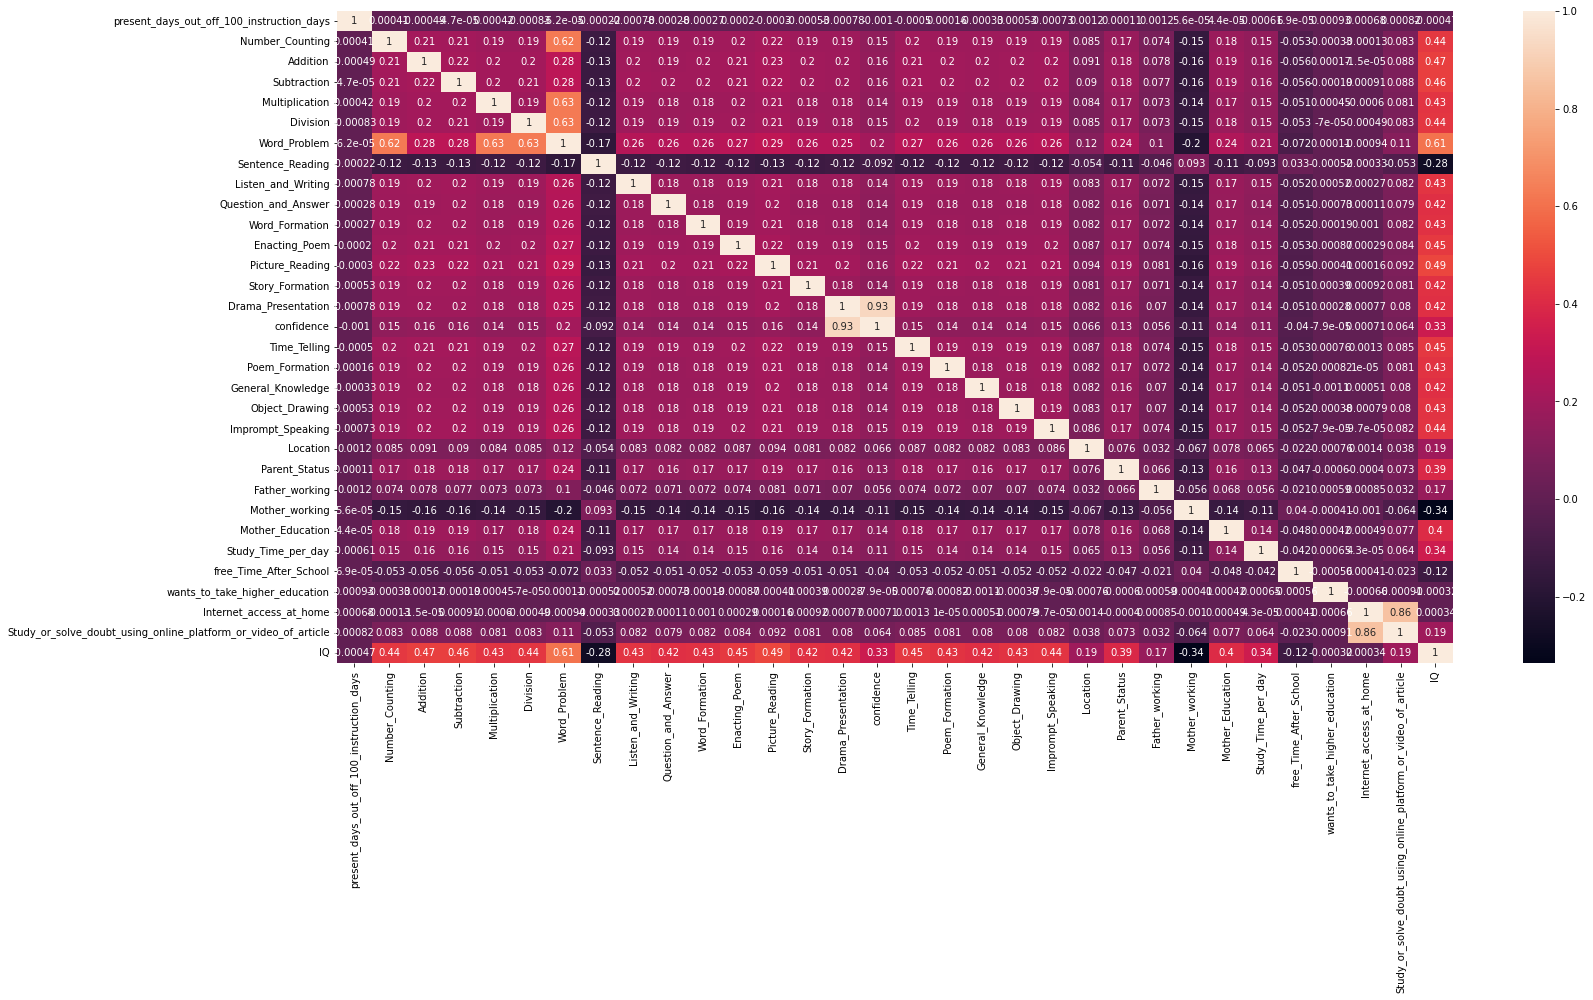

In [245]:
plt.figure(figsize=(25,12))
sns.heatmap(df[:2000000].corr(),annot=True)
plt.show()

- No any feature looks like highely (positively or negatively) correlated with target column so we didn't get clear idea

- So now we will try with another feature selection methods

#### Feature Selection With Mutual information

In [246]:
array = mutual_info_classif(x,y)
s1 = pd.Series(array, index = x.columns)

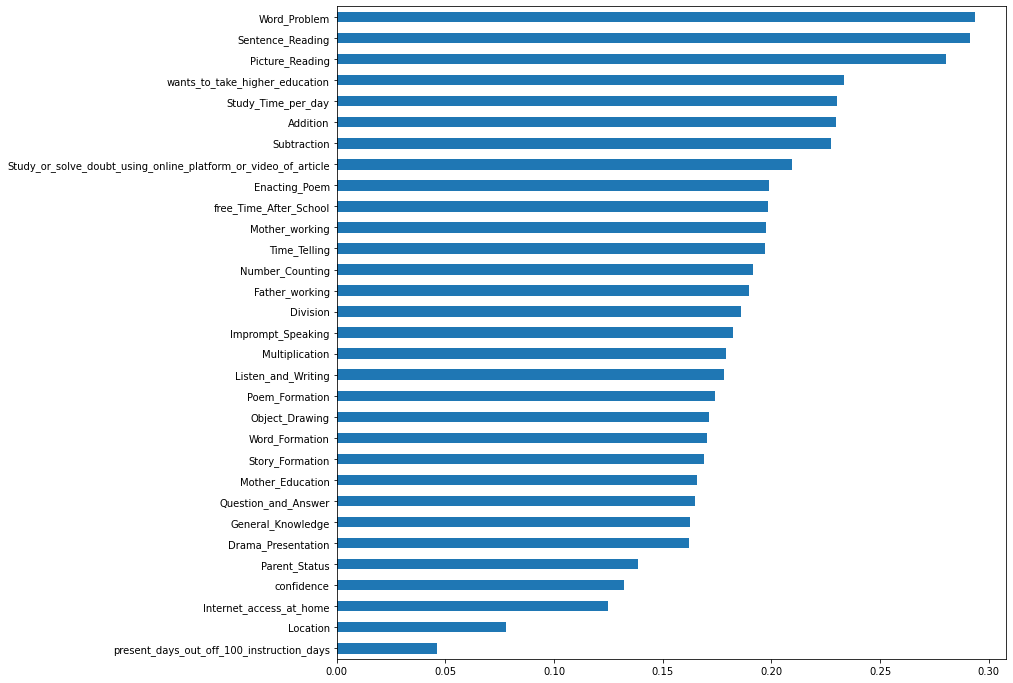

In [247]:
plt.figure(figsize=(12,12))
s1.sort_values().plot(kind = 'barh')
plt.show()

- Mutual Information will determines the reduction in entropy.

- Entropy means measure of impurity.

- Whatever the feature will Provide maximum Information Gain will be ranked as 1 or selected as 1 and so on.

#### Feature Selection With Anova Test

,Feature,f_val,p_val
0,present_days_out_off_100_instruction_days,4.403934e-01,0.506933
1,Number_Counting,4.878599e+05,0.000000
2,Addition,5.552853e+05,0.000000
3,Subtraction,5.510636e+05,0.000000
4,Multiplication,4.633402e+05,0.000000
5,Division,4.772965e+05,0.000000
6,Word_Problem,1.162067e+06,0.000000
7,Sentence_Reading,1.645190e+05,0.000000
8,Listen_and_Writing,4.589373e+05,0.000000
9,Question_and_Answer,4.292352e+05,0.000000


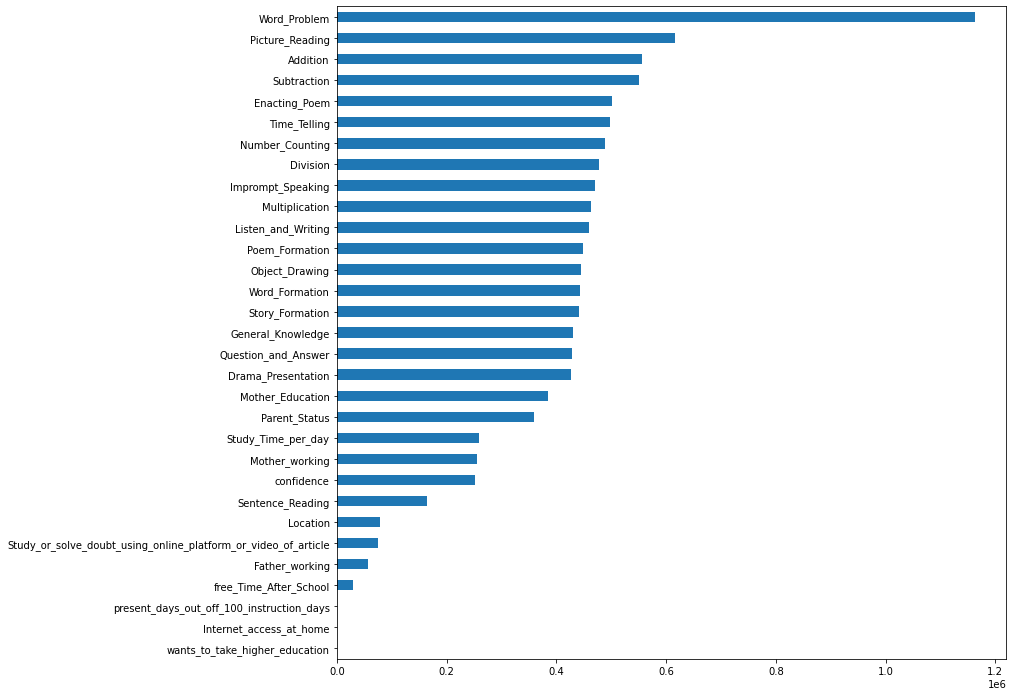

In [248]:
f_val, p_val = f_classif(x,y)

df_anova = pd.DataFrame({'Feature':x.columns,"f_val":f_val, "p_val":p_val})
display(df_anova)

s1 = pd.Series(f_val,index =x.columns)

plt.figure(figsize=(12,12))
s1.sort_values().plot(kind= 'barh')
plt.show()

- It will return f_value some statistical value and p_value (basically probability).

- In case of feature selection whatever the feature has maximum f_val will be selected as 1 or score as 1 and so on.

### Take Away

- From the above feature selection methods we can conclude that Word_Problem, Picture_Reading, Number_Counting, Addition, Subtraction, Multiplication, Division, Sentence_Reading, Time_Telling, Enacting_Poem, Imprompt_Speaking, Word_Formation are the highely correlated features. So we will build our model on above feature

- We select the most impactful features for model training purpose to avoid the time complexity and model complexity 

In [249]:
col_list = df.columns
sel_col = ["Word_Problem","Picture_Reading","Number_Counting","Addition","Subtraction","Multiplication","Division","Sentence_Reading","Time_Telling","Enacting_Poem","Imprompt_Speaking","Word_Formation", "IQ"]
drop_col = [i for i in col_list if i not in sel_col]
drop_col

['present_days_out_off_100_instruction_days',
 'Listen_and_Writing',
 'Question_and_Answer',
 'Story_Formation',
 'Drama_Presentation',
 'confidence',
 'Poem_Formation',
 'General_Knowledge',
 'Object_Drawing',
 'Location',
 'Parent_Status',
 'Father_working',
 'Mother_working',
 'Mother_Education',
 'Study_Time_per_day',
 'free_Time_After_School',
 'wants_to_take_higher_education',
 'Internet_access_at_home',
 'Study_or_solve_doubt_using_online_platform_or_video_of_article']

In [250]:
df.drop(drop_col,axis = 1,inplace=True)

In [251]:
df.shape

(2400000, 13)

### Train Test Split Of Dataset

In [252]:
x = df[:2000000].drop("IQ",axis=1)
y = df["IQ"][:2000000]

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=22,stratify=y)

## Handling imbalancing of dataset by SMOTE Technique

In [253]:
sm = SMOTE(random_state=12)
x_train_smote, y_train_smote = sm.fit_resample(x_train,y_train)

In [254]:
x_train_smote

,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Word_Formation,Enacting_Poem,Picture_Reading,Time_Telling,Imprompt_Speaking
0,5,6,7,7,6,6.0,10,3,3,8,7,5
1,6,7,9,6,6,6.0,10,6,4,9,6,7
2,8,7,7,5,6,6.0,10,6,8,8,7,8
3,7,7,4,6,7,6.0,10,8,7,6,7,6
4,8,4,4,8,7,7.0,10,6,8,8,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2879995,10,9,10,8,9,9.0,10,8,9,10,9,10
2879996,9,8,10,9,9,10.0,10,5,6,10,9,10
2879997,10,9,10,9,9,8.0,10,8,10,10,8,9
2879998,9,9,10,7,10,6.0,10,7,10,9,8,8


In [255]:
x_train_smote.shape

(2880000, 12)

<AxesSubplot:xlabel='IQ', ylabel='count'>

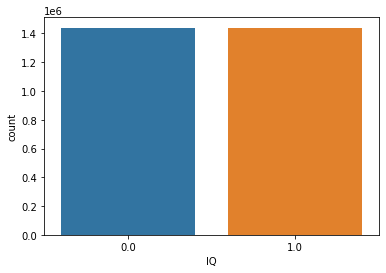

In [256]:
sns.countplot(y_train_smote)

In [257]:
y_train_smote.value_counts()

0.0    1440000
1.0    1440000
Name: IQ, dtype: int64

# Training Model with Decision Tree Classifier

### Model Training

In [258]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier()

### Evaluation of training dataset

Confusion Matrix :
 [[1439997       3]
 [      0 1440000]]
clf_report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1440000
         1.0       1.00      1.00      1.00   1440000

    accuracy                           1.00   2880000
   macro avg       1.00      1.00      1.00   2880000
weighted avg       1.00      1.00      1.00   2880000

Accuracy Score is :
 0.9999989583333333


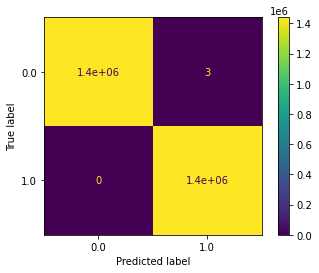

In [259]:
y_pred_train = dt_clf.predict(x_train_smote)

cnf_matrix = confusion_matrix(y_train_smote, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

plot_confusion_matrix(dt_clf,x_train_smote, y_train_smote)

clf_report = classification_report(y_train_smote, y_pred_train)
print("clf_report :\n",clf_report)

acc_score = accuracy_score(y_train_smote, y_pred_train)
print("Accuracy Score is :\n", acc_score)

### Testing Data (of Training) Evaluation

Confusion Matrix :
 [[359634    366]
 [   176  39824]]
clf_report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    360000
         1.0       0.99      1.00      0.99     40000

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000

Accuracy Score is :
 0.998645


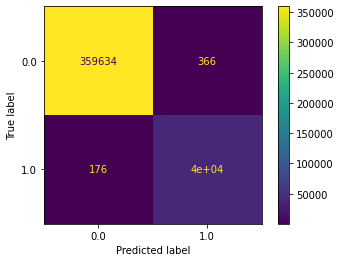

In [260]:
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

plot_confusion_matrix(dt_clf,x_test, y_test)

clf_report = classification_report(y_test, y_pred)
print("clf_report :\n",clf_report)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :\n", acc_score)

### Take Away

- As the Data is so nice and clean so i get the best results for models, i dont need to do Hyper-Parameter Tuning or move towards the complex model.

- As i get the best results for Recall, Precision, f1-Score so i don't look at roc_auc curve.

- As mentioned in case study i have to focus on ExtraOrdinary class which i considered as 1 means i have to focus on Recall but the results that i get are satifactory so i am moving with Decision Tree Classifier

- I was decided move towards Ensemble learning techniques after doing Hyper parameter tuning for DT but the DT_classifier itself gives the best reults so i stop at Decision Tree Classifier only

### Now Predicting IQ level for the Test DataSet

In [261]:
test_df

,dd$id,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,...,Parent_Status,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Study_or_solve_doubt_using_online_platform_or_video_of_article
0,1,96.0,8,8,6,4,4,5.0,10,8,...,0,1,0,None,1-<2hours,high,1,0,Facebook,1.0
1,2,94.0,8,9,10,7,5,6.0,10,8,...,0,1,1,Upper_Primary,1-<2hours,verylow,1,0,Noneoftheabove,1.0
2,3,96.0,9,6,5,7,5,7.0,10,5,...,0,1,0,Higher_Secondary,1-<2hours,veryhigh,1,0,Instagram,1.0
3,4,96.0,4,8,6,6,6,5.0,10,6,...,0,1,1,Upper_Primary,1-<2hours,high,1,1,Facebook,4.5
4,5,93.0,9,10,10,8,10,10.0,10,8,...,1,1,0,None,4to<6hours,moderate,1,1,Noneoftheabove,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,199996,95.0,9,8,10,10,9,7.0,10,7,...,1,1,1,Graduation,1-<2hours,moderate,0,1,Noneoftheabove,8.5
399996,199997,95.0,8,9,10,6,9,8.0,10,8,...,1,1,0,Graduation,4to<6hours,moderate,1,1,Noneoftheabove,8.5
399997,199998,95.0,9,10,8,10,8,8.0,10,7,...,1,1,0,Graduation,4to<6hours,veryhigh,1,0,Noneoftheabove,1.0
399998,199999,92.0,9,9,10,10,8,10.0,10,9,...,1,1,0,Graduation,4to<6hours,moderate,1,1,Noneoftheabove,8.5


In [262]:
df.shape

(2400000, 13)

In [263]:
testing_x = df[2000000:].drop("IQ",axis = 1)
testing_y_pred = dt_clf.predict(testing_x)

In [264]:
test_df["IQ"] = testing_y_pred
test_df["IQ"].replace({0:"Ordinary",1:"Extraordinary"}, inplace=True)
test_df

,dd$id,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,...,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Study_or_solve_doubt_using_online_platform_or_video_of_article,IQ
0,1,96.0,8,8,6,4,4,5.0,10,8,...,1,0,None,1-<2hours,high,1,0,Facebook,1.0,Ordinary
1,2,94.0,8,9,10,7,5,6.0,10,8,...,1,1,Upper_Primary,1-<2hours,verylow,1,0,Noneoftheabove,1.0,Ordinary
2,3,96.0,9,6,5,7,5,7.0,10,5,...,1,0,Higher_Secondary,1-<2hours,veryhigh,1,0,Instagram,1.0,Ordinary
3,4,96.0,4,8,6,6,6,5.0,10,6,...,1,1,Upper_Primary,1-<2hours,high,1,1,Facebook,4.5,Ordinary
4,5,93.0,9,10,10,8,10,10.0,10,8,...,1,0,None,4to<6hours,moderate,1,1,Noneoftheabove,8.5,Extraordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,199996,95.0,9,8,10,10,9,7.0,10,7,...,1,1,Graduation,1-<2hours,moderate,0,1,Noneoftheabove,8.5,Extraordinary
399996,199997,95.0,8,9,10,6,9,8.0,10,8,...,1,0,Graduation,4to<6hours,moderate,1,1,Noneoftheabove,8.5,Extraordinary
399997,199998,95.0,9,10,8,10,8,8.0,10,7,...,1,0,Graduation,4to<6hours,veryhigh,1,0,Noneoftheabove,1.0,Extraordinary
399998,199999,92.0,9,9,10,10,8,10.0,10,9,...,1,0,Graduation,4to<6hours,moderate,1,1,Noneoftheabove,8.5,Extraordinary
